In [2]:
import keras
import os
import numpy as np
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import applications
import tensorflow as tf
import matplotlib.pyplot as plt


In [3]:
trainData = ImageDataGenerator()
trainingdt = trainData.flow_from_directory(directory='RealvsFake/Training', target_size=(224,224))


Found 101965 images belonging to 2 classes.


In [4]:
testData = ImageDataGenerator()
testingdt = testData.flow_from_directory(directory='RealvsFake/Testing', target_size=(224,224))


Found 20076 images belonging to 2 classes.


In [5]:
def preprocess(file_path):
        byte_img = tf.io.read_file(file_path)
        img = tf.io.decode_jpeg(byte_img)
        img = tf.image.resize(img, (224,224))
        img = img / 255.0
        return img

In [6]:
img = preprocess('RealvsFake/Training/real/real_00001.jpg')

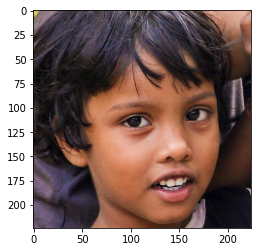

In [7]:
plt.imshow(img)

In [8]:
def preprocess_twin(input_img, label):
    return (preprocess(input_img), label)

In [9]:
VGG = applications.vgg16.VGG16(input_shape=(224,224,3), include_top= False, weights='imagenet')

In [10]:
for layer in VGG.layers:
    layer.trainable= False
    

In [12]:
VGG.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [16]:
feature_extractor=VGG.predict(trainingdt)

KeyboardInterrupt: 

In [ ]:
features= feature_extractor.reshape(feature_extractor.shape[0],-1)

In [ ]:
from sklearn import svm


In [ ]:
model.compile(optimizer='adam', loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
model.summary()

In [ ]:

hist= model.fit_generator(steps_per_epoch=100,generator=trainingdt, validation_data= testingdt,
                validation_steps=10,epochs=10)


In [ ]:
model.save('vggclf.h5')

In [ ]:
plt.plot(hist.history["accuracy"])
plt.plot(hist.history["val_accuracy"])
plt.plot(hist.history["loss"])
plt.plot(hist.history["val_loss"])
plt.title("model accuracy")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend(["Accuracy","Validation Accuracy","loss","Validation loss"])
plt.show()
